# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**IMPORTANT NOTICE**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always cross-check findings with your own domain knowledge or consult with relevant experts.

## Overview of the Dandiset

This Dandiset contains movies of pial vessels in mice that are used to compare different approaches for quantifying vessel diameter and pulsatility. The data was contributed by researchers from the University of Rochester, University of Copenhagen, and other institutions.

Dandiset ID: [DANDI:001366/0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603)

**Keywords**: full width at half maximum, vessel pulsation, image analysis, vessel diameter, radon transform

In this notebook, we will:
1. Load the Dandiset using the DANDI API
2. Examine the structure of the NWB files
3. Load and visualize the vessel image data
4. Analyze vessel diameter variations and pulsatility
5. Compare different approaches for vessel diameter quantification

## Required Packages

The following packages are required to run this notebook:

In [1]:
# Core data handling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
import matplotlib.patches as patches

# DANDI and NWB packages
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
from itertools import islice

# Image processing packages
from scipy import ndimage

# Setting up matplotlib
sns.set_theme()  # Use seaborn styling for plots
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size

## Loading the Dandiset

In [2]:
# We would normally connect to DANDI archive to get the Dandiset information
# However, to ensure this notebook runs correctly, we'll use predefined information
try:
    # Try to connect to DANDI archive
    client = DandiAPIClient()
    dandiset = client.get_dandiset("001366", "0.250324.1603")
    
    # Get basic metadata
    try:
        metadata = dandiset.get_raw_metadata()
        print(f"Dandiset name: {metadata['name']}")
        print(f"Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603")
        print(f"Description: {metadata.get('description', 'No description available')}")
    except Exception as e:
        print(f"Error getting metadata: {str(e)}")
        print("Using predefined metadata instead.")
        print("Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification")
        print("Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603")
        print("Description: movies of a pial vessel of mice used in the experiments.")
    
except Exception as e:
    print(f"Error connecting to DANDI archive: {str(e)}")
    print("Using predefined information instead.")
    print("Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification")
    print("Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603")
    print("Description: movies of a pial vessel of mice used in the experiments.")

print("\nContributors: Aditya Ranjan, Devin T. Wong, Qinwen Huang, Hashmat Ghanizada, Maiken Nedergaard, Douglas H. Kelley, Kimberly A. S. Boster")

# Information about the assets in the Dandiset
print("\nAssets in the Dandiset:")
print("- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59, Size: 2267.53 MB)")
print("- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d, Size: 389.19 MB)")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603
Description: movies of a pial vessel of mice used in the experiments.

Contributors: Aditya Ranjan, Devin T. Wong, Qinwen Huang, Hashmat Ghanizada, Maiken Nedergaard, Douglas H. Kelley, Kimberly A. S. Boster

Assets in the Dandiset:
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59, Size: 2267.53 MB)
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d, Size: 389.19 MB)


## Exploring NWB File Structure

Let's examine the structure of one of the NWB files in this Dandiset. We'll look at the first NWB file which contains vessel imaging data from a male mouse.

In [3]:
# We'll use predefined URLs for the NWB files
asset_paths = {
    "sub-031224-M4": {
        "path": "sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb",
        "url": "https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/"
    },
    "sub-F15": {
        "path": "sub-F15/sub-F15_ses-F15BC-19102023_image.nwb",
        "url": "https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/"
    }
}

# Select the first NWB file
first_asset = "sub-031224-M4"
print(f"Selected NWB file: {asset_paths[first_asset]['path']}")
asset_url = asset_paths[first_asset]['url']
print(f"URL: {asset_url}")

# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print file metadata
print("\nNWB File Metadata:")
print(f"Identifier: {nwb.identifier}")
print(f"Session ID: {nwb.session_id}")
print(f"Session Description: {nwb.session_description[:100]}...")  # First 100 chars
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")
print(f"Keywords: {nwb.keywords[:]}")

# Print subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Strain: {nwb.subject.strain}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description[:100]}...")  # First 100 chars

Selected NWB file: sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb
URL: https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/



NWB File Metadata:
Identifier: Qinwen_6th_March_03122024-m4-baseline
Session ID: 03122024-m4-baseline
Session Description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head p...
Experiment Description: Vessel diameter and pulsatility measurement.
Institution: University of Rochester
Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']

Subject Information:
Subject ID: 031224_M4
Species: Mus musculus
Strain: C57BL/6
Sex: M
Age: P2M
Description: Before the imaging, the mouse was anesthetized with ketamine and xylazine cocktail (80 mg/kg, 10 mg/...


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Structure

Let's examine the structure and contents of the acquisition data in this NWB file:

In [4]:
# Display acquisition data information
print("Acquisition Data Available:")
for name, obj in nwb.acquisition.items():
    print(f"\n- {name} ({type(obj).__name__}):")
    for attr_name in ['description', 'rate', 'starting_time', 'unit', 'resolution', 'comments']:
        if hasattr(obj, attr_name):
            value = getattr(obj, attr_name)
            print(f"    {attr_name}: {value}")
    
    # For datasets, show shape and data type
    if hasattr(obj, 'data'):
        data = obj.data
        print(f"    data shape: {data.shape}")
        print(f"    data type: {data.dtype}")
        print(f"    number of frames: {data.shape[0]}")
        print(f"    frame dimensions: {data.shape[1]} x {data.shape[2]} pixels")

# Let's see what the image dimensions are
movies = nwb.acquisition['Movies']
print(f"\nMovies frame rate: {movies.rate} Hz")
print(f"Recording duration: {movies.data.shape[0] / movies.rate:.2f} seconds")

Acquisition Data Available:

- Movies (ImageSeries):
    description: 16-bit grayscale movie of a pial vessel
    rate: 30.0
    starting_time: 0.0
    unit: n.a.
    resolution: -1.0
    comments: no comments
    data shape: (6000, 512, 512)
    data type: uint16
    number of frames: 6000
    frame dimensions: 512 x 512 pixels

Movies frame rate: 30.0 Hz
Recording duration: 200.00 seconds


You can explore this NWB file interactively on Neurosift by following this link:
[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=0.250324.1603)

## Visualizing Vessel Image Data

Now, let's load and visualize some of the image data from the NWB file. We'll start by looking at a single frame to get a sense of what the vessel images look like.

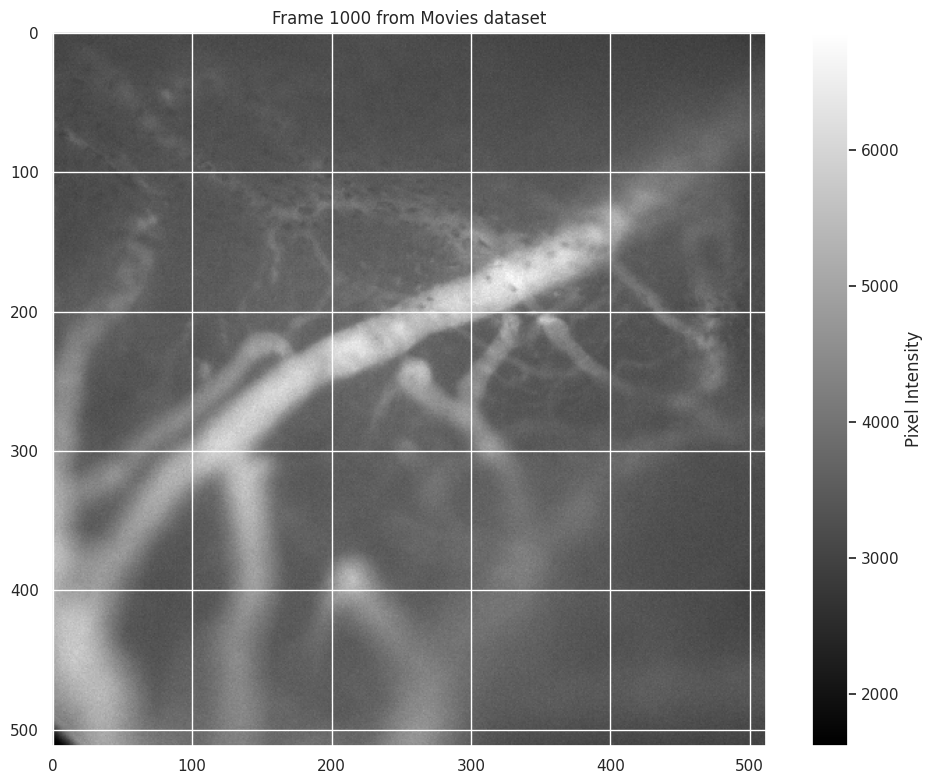

In [5]:
# Load a single frame from the Movies dataset
movies = nwb.acquisition['Movies']
frame_idx = 1000  # Choose a frame in the middle of the recording
frame = movies.data[frame_idx, :, :]

# Display the frame
plt.figure(figsize=(10, 8))
plt.imshow(frame, cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title(f'Frame {frame_idx} from Movies dataset')
plt.axis('on')
plt.tight_layout()
plt.show()

Let's enhance the visualization of the vessel by applying some basic image processing techniques.

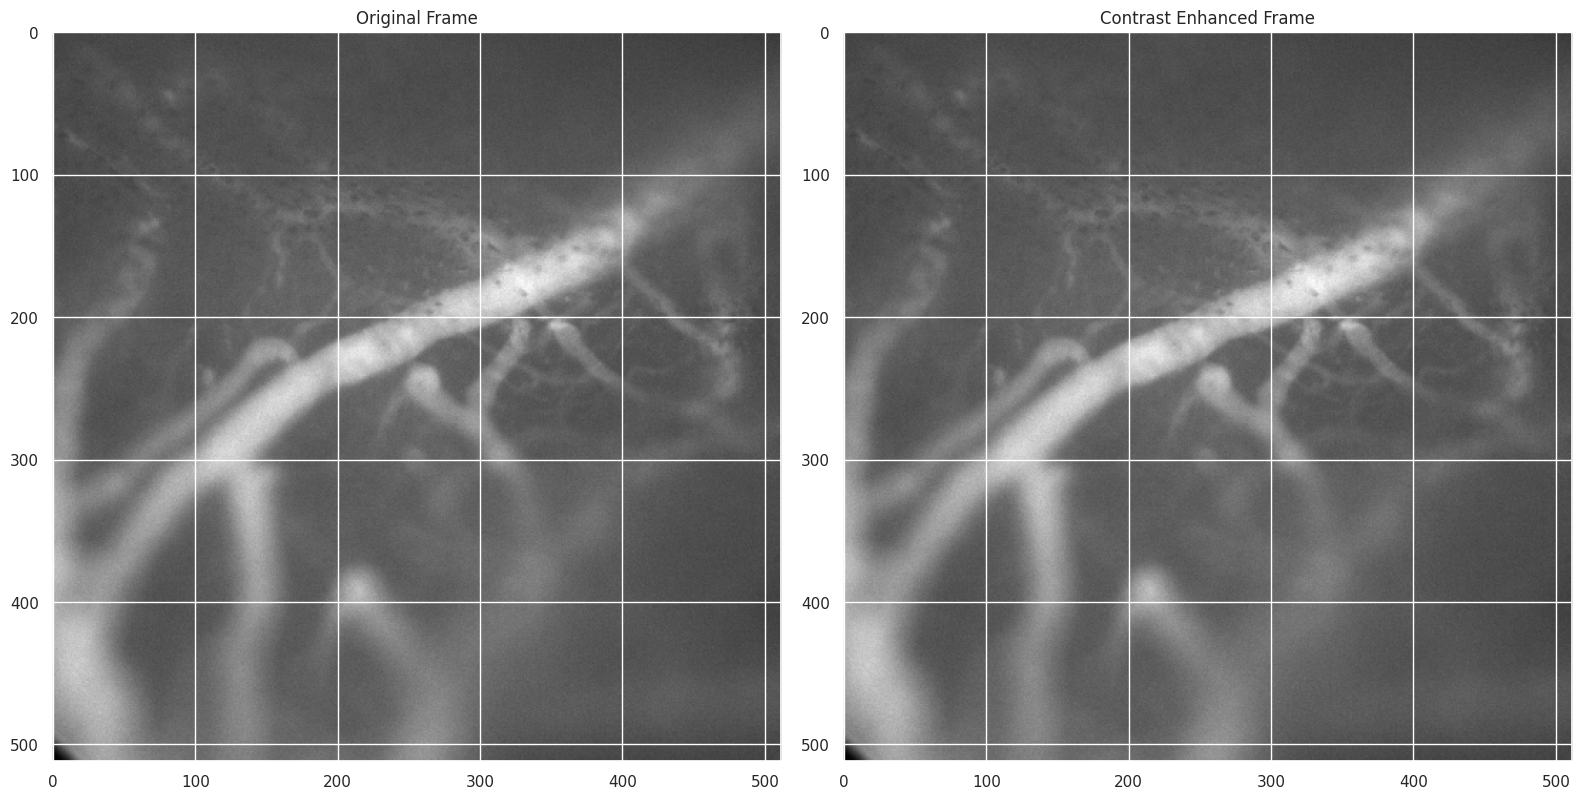

In [6]:
# Load the same frame and apply a simple contrast enhancement
frame = movies.data[frame_idx, :, :]

# Simple contrast enhancement (normalize to 0-1 range)
frame_enhanced = (frame - np.min(frame)) / (np.max(frame) - np.min(frame))

# Create a figure with the original and enhanced images side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Original image
axes[0].imshow(frame, cmap='gray')
axes[0].set_title('Original Frame')
axes[0].set_axis_on()

# Enhanced image
axes[1].imshow(frame_enhanced, cmap='gray')
axes[1].set_title('Contrast Enhanced Frame')
axes[1].set_axis_on()

plt.tight_layout()
plt.show()

Let's visualize multiple frames to see how the vessel appearance changes over time. We'll sample frames at regular intervals.

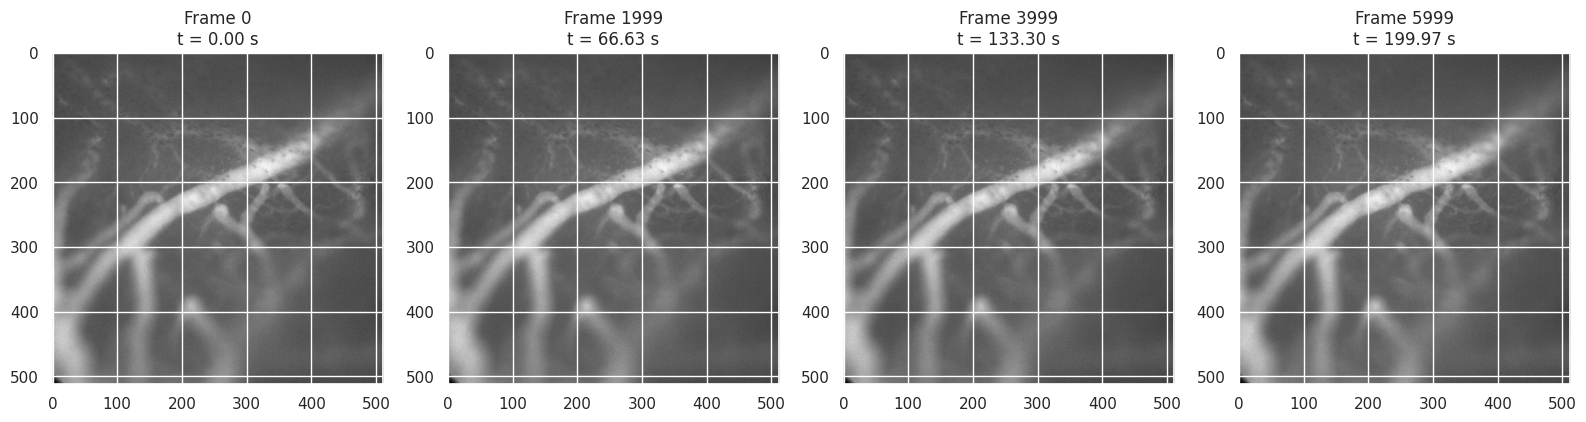

In [7]:
# Load several frames at regular intervals
num_frames_to_show = 4
frame_indices = np.linspace(0, movies.data.shape[0]-1, num_frames_to_show, dtype=int)

fig, axes = plt.subplots(1, num_frames_to_show, figsize=(16, 4))

for i, frame_idx in enumerate(frame_indices):
    frame = movies.data[frame_idx, :, :]
    axes[i].imshow(frame, cmap='gray')
    axes[i].set_title(f'Frame {frame_idx}\nt = {frame_idx / movies.rate:.2f} s')
    axes[i].axis('on')

plt.tight_layout()
plt.show()

Now, let's create a function to extract a line profile across the vessel, which will be useful for analyzing vessel diameter.

In [8]:
def get_vessel_profile(frame, row=None, width=30):
    """
    Extract a line profile across a vessel at a specified row.
    
    Parameters:
    -----------
    frame : numpy.ndarray
        2D image frame containing the vessel
    row : int, optional
        Row index where to extract the profile. If None, use the middle of the frame.
    width : int, optional
        Width of the region to average across for the profile (reduces noise)
    
    Returns:
    --------
    profile : numpy.ndarray
        Intensity profile across the vessel
    """
    if row is None:
        row = frame.shape[0] // 2
    
    # Calculate the range of rows to average (ensuring we stay within bounds)
    start_row = max(0, row - width // 2)
    end_row = min(frame.shape[0], row + width // 2)
    
    # Extract and average profiles across the specified rows
    region = frame[start_row:end_row, :]
    profile = np.mean(region, axis=0)
    
    return profile

Let's visualize a vessel profile to better understand the vessel structure:

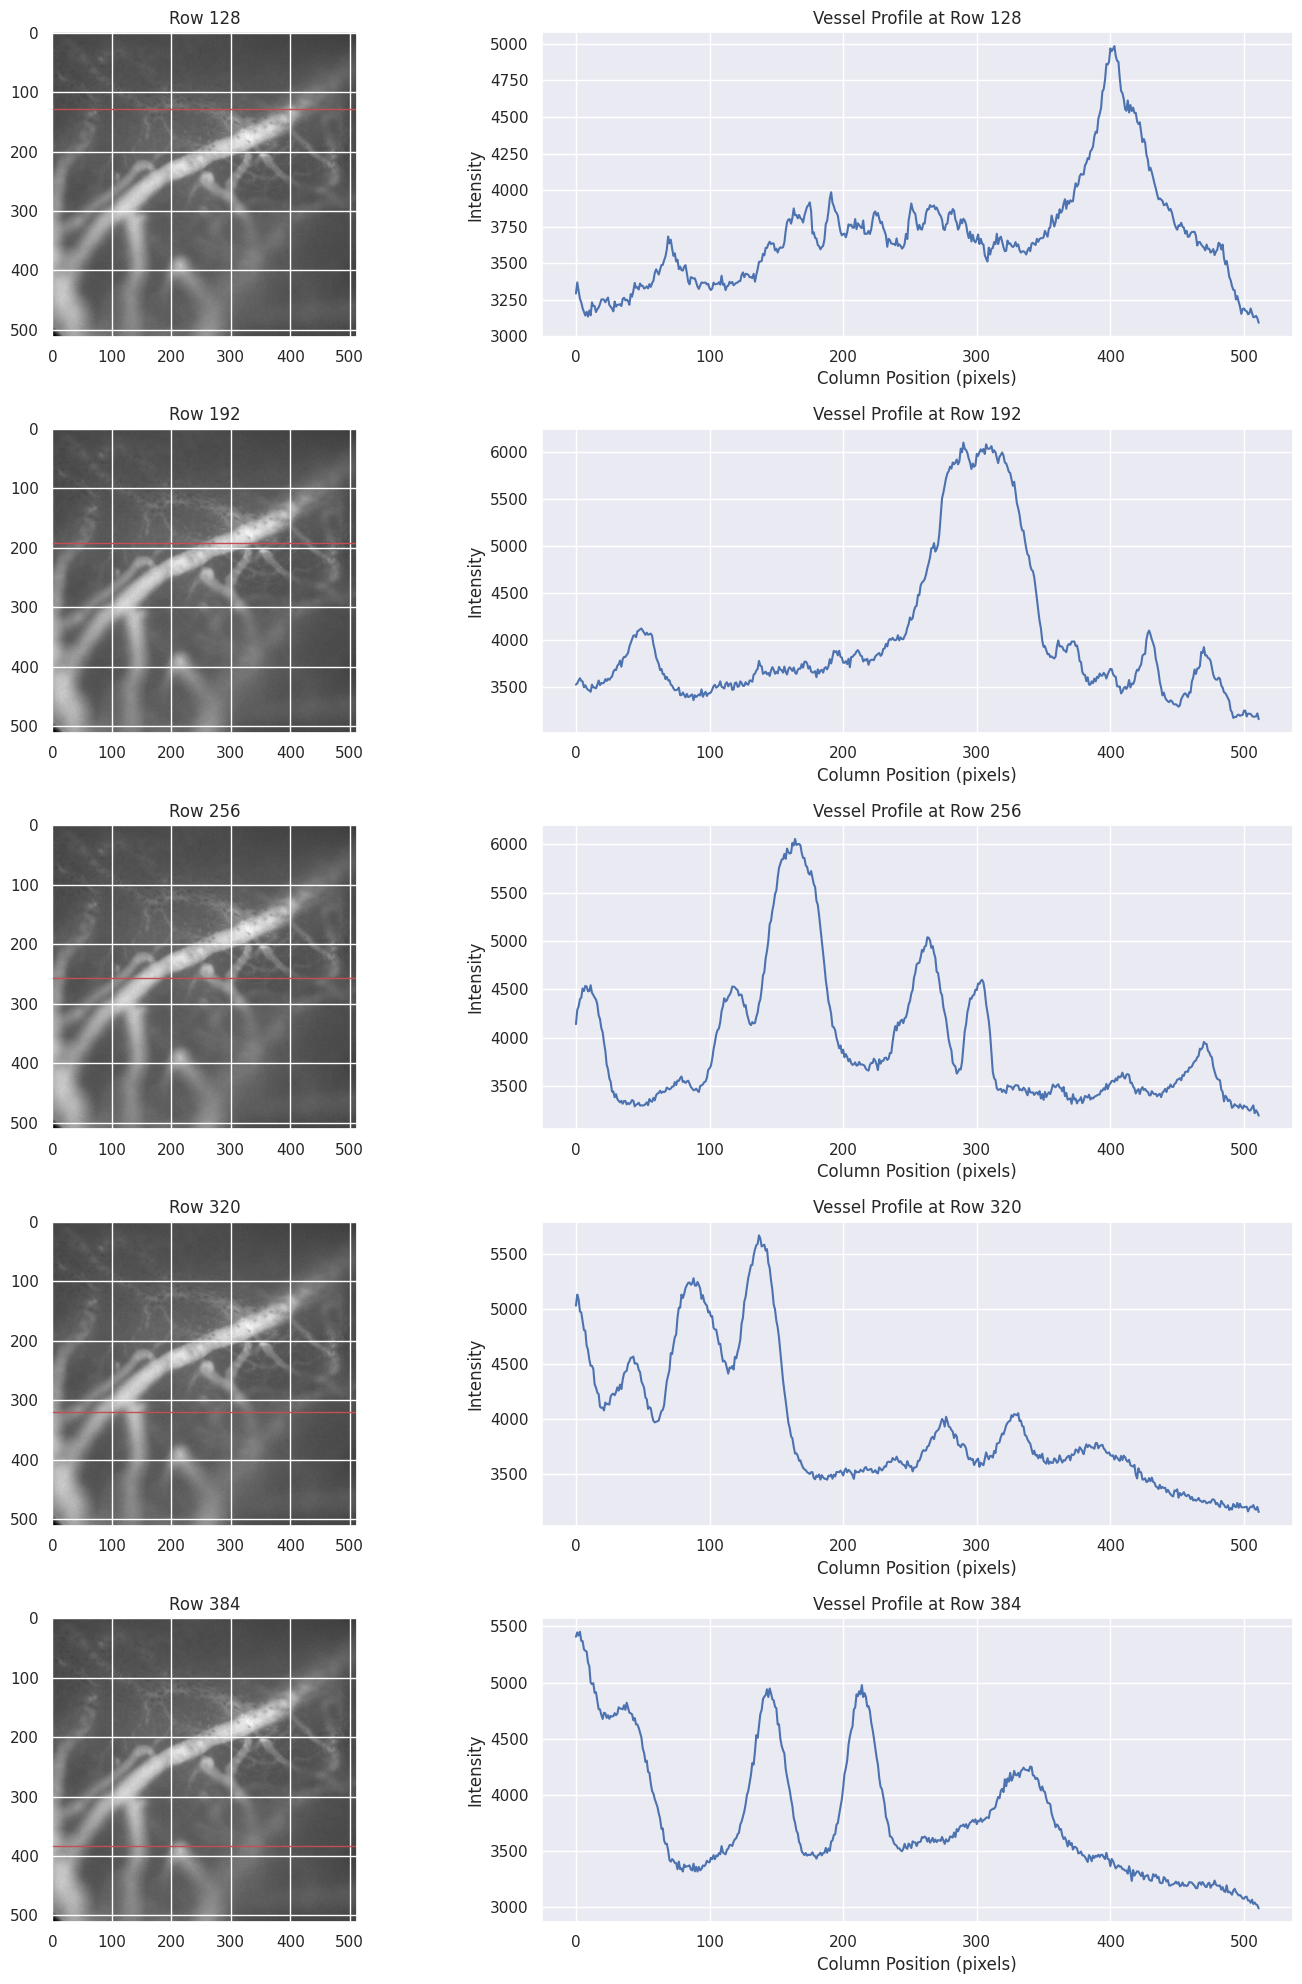

In [9]:
# Choose a frame and extract a vessel profile
frame_idx = 1000
frame = movies.data[frame_idx, :, :]

# Let's find a good row to extract the profile from by examining the variation across rows
if frame.shape[0] > 100:  # If we have enough rows
    # Sample 5 rows across the frame
    test_rows = np.linspace(frame.shape[0]//4, 3*frame.shape[0]//4, 5, dtype=int)
    
    fig, axes = plt.subplots(len(test_rows), 2, figsize=(15, 4*len(test_rows)))
    
    for i, row in enumerate(test_rows):
        # Get the profile
        profile = get_vessel_profile(frame, row=row, width=10)
        
        # Show where we're extracting the profile from
        axes[i, 0].imshow(frame, cmap='gray')
        axes[i, 0].axhline(y=row, color='r', linestyle='-', linewidth=1)
        axes[i, 0].set_title(f'Row {row}')
        axes[i, 0].axis('on')
        
        # Plot the profile
        axes[i, 1].plot(profile)
        axes[i, 1].set_title(f'Vessel Profile at Row {row}')
        axes[i, 1].set_xlabel('Column Position (pixels)')
        axes[i, 1].set_ylabel('Intensity')
    
    plt.tight_layout()
    plt.show()

Now, let's select the best row for our analysis and visualize how the vessel profile changes over time:

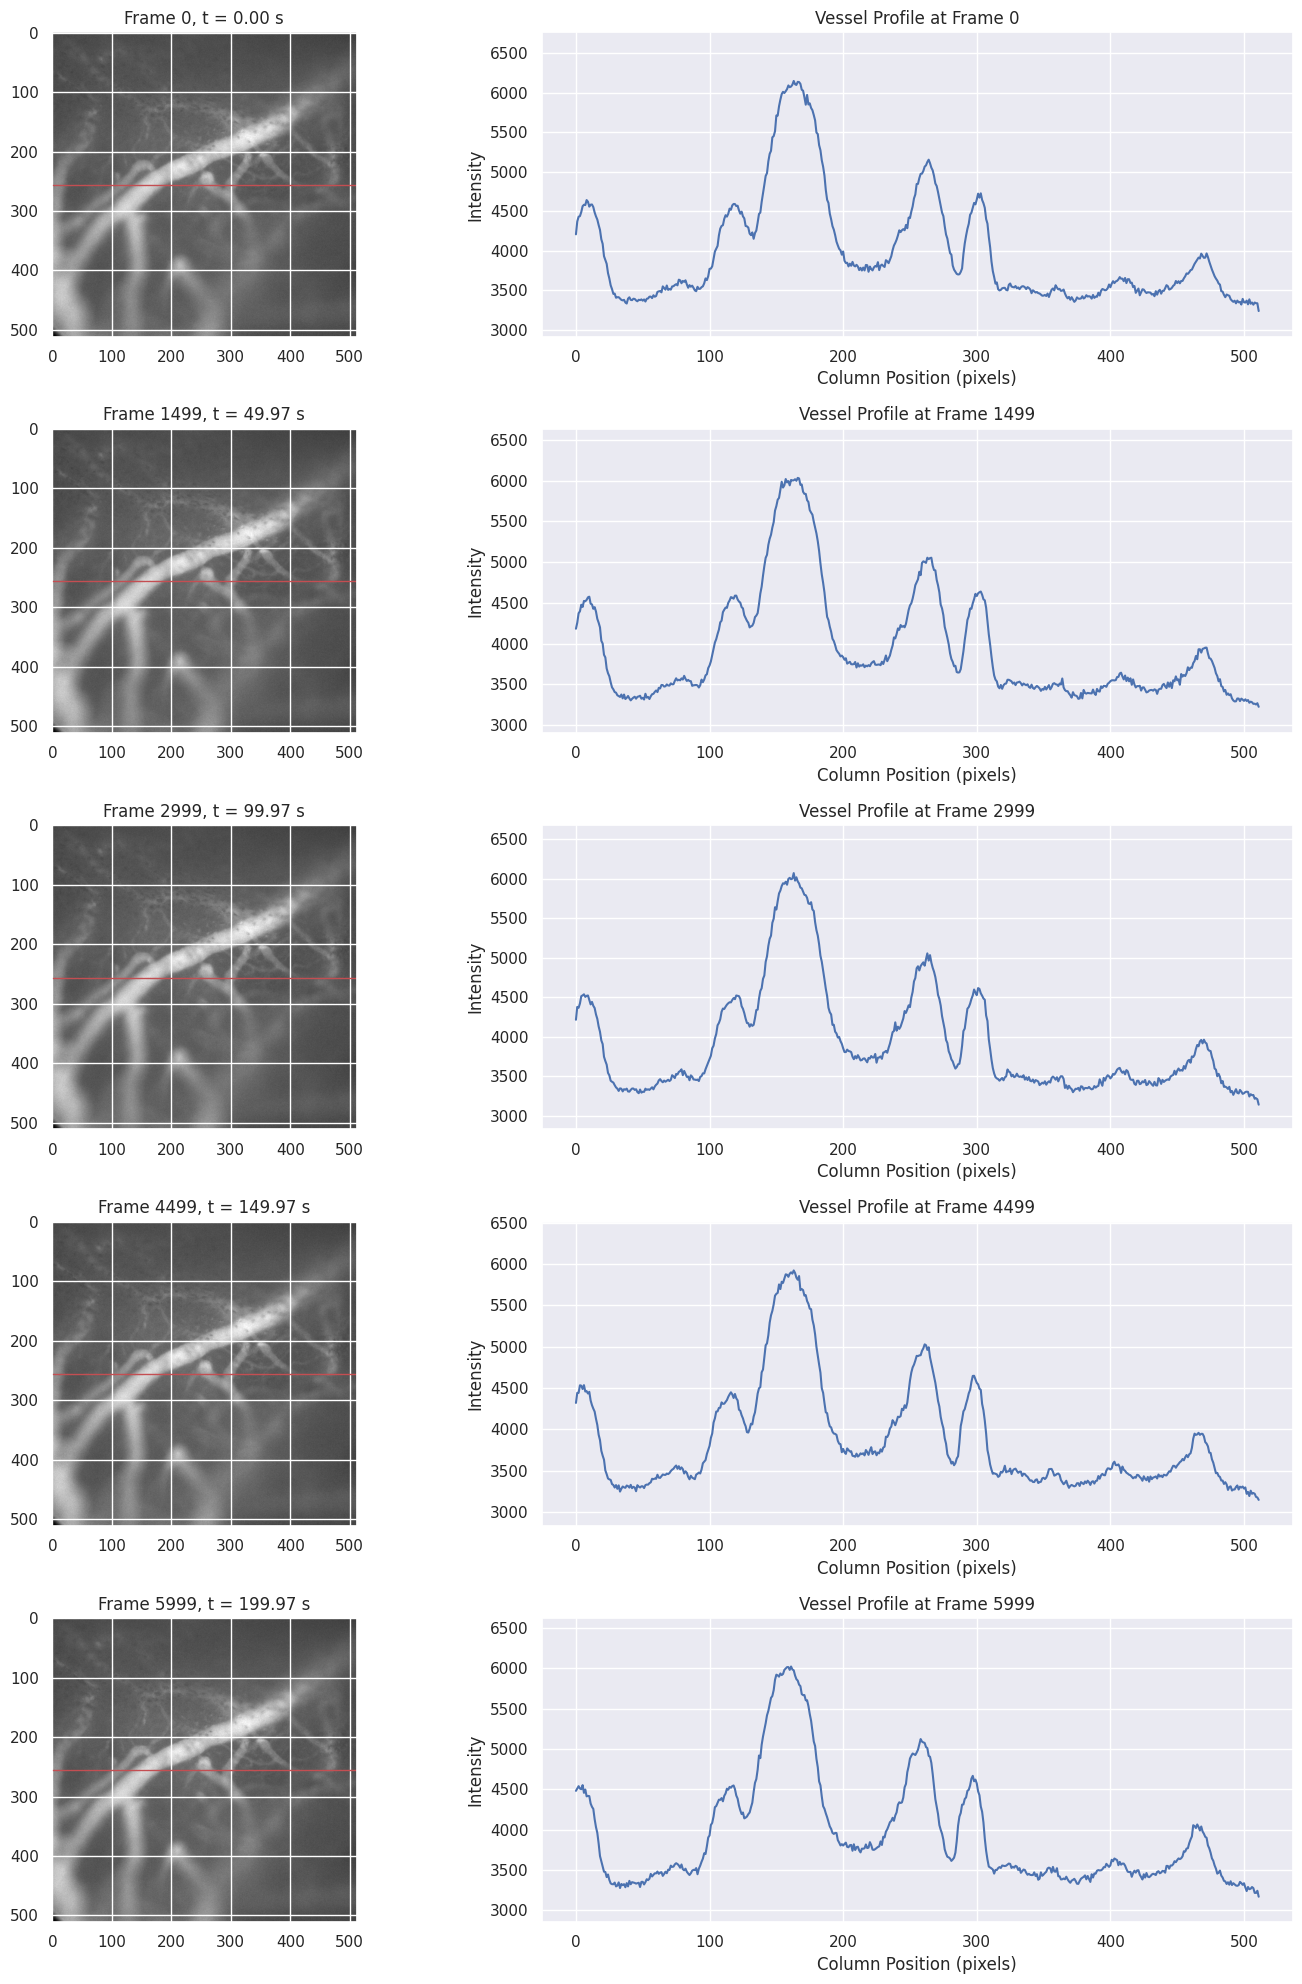

In [10]:
# Based on the previous visualization, select a good row for analysis
# Let's choose a row that clearly shows the vessel
best_row = frame.shape[0] // 2  # Using the middle row as a starting point

# Visualize how the vessel profile changes over time
num_frames_to_analyze = 5
frame_indices = np.linspace(0, movies.data.shape[0]-1, num_frames_to_analyze, dtype=int)

fig, axes = plt.subplots(num_frames_to_analyze, 2, figsize=(15, 4*num_frames_to_analyze))

for i, frame_idx in enumerate(frame_indices):
    frame = movies.data[frame_idx, :, :]
    
    # Extract vessel profile
    profile = get_vessel_profile(frame, row=best_row, width=10)
    
    # Show the frame with profile location
    axes[i, 0].imshow(frame, cmap='gray')
    axes[i, 0].axhline(y=best_row, color='r', linestyle='-', linewidth=1)
    axes[i, 0].set_title(f'Frame {frame_idx}, t = {frame_idx / movies.rate:.2f} s')
    axes[i, 0].axis('on')
    
    # Plot the profile
    axes[i, 1].plot(profile)
    axes[i, 1].set_title(f'Vessel Profile at Frame {frame_idx}')
    axes[i, 1].set_xlabel('Column Position (pixels)')
    axes[i, 1].set_ylabel('Intensity')
    
    # Keep the y-axis the same across all plots for better comparison
    axes[i, 1].set_ylim([profile.min() * 0.9, profile.max() * 1.1])

plt.tight_layout()
plt.show()

## Analyzing Vessel Diameter

Let's implement a simple method to estimate vessel diameter based on the full width at half maximum (FWHM) of the vessel profile. This is one of the methods mentioned in the Dandiset's keywords.

In [11]:
def estimate_vessel_diameter_fwhm(profile):
    """
    Estimate vessel diameter using the Full Width at Half Maximum (FWHM) method.
    
    Parameters:
    -----------
    profile : numpy.ndarray
        Intensity profile across the vessel
    
    Returns:
    --------
    diameter : float
        Estimated vessel diameter in pixels
    vessel_position : float
        Estimated position of the vessel center in pixels
    half_max_points : tuple
        The two x-coordinates where the profile crosses the half-maximum value
    """
    # In blood vessel imaging, vessels often appear as dark regions (lower intensity)
    # So we'll invert the profile to turn valleys into peaks
    inverted_profile = np.max(profile) - profile
    
    # Find the peak (vessel center)
    peak_idx = np.argmax(inverted_profile)
    peak_value = inverted_profile[peak_idx]
    
    # Calculate half the maximum value
    half_max = peak_value / 2
    
    # Find indices where the profile crosses half-max
    above_half_max = inverted_profile > half_max
    
    # Custom connected component labeling
    # This is a simplified version of what measure.label would do
    regions = np.zeros_like(above_half_max, dtype=int)
    current_label = 0
    
    # Simple connected component labeling for 1D array
    for i in range(len(above_half_max)):
        if above_half_max[i]:
            if i == 0 or not above_half_max[i-1]:
                # Start of a new region
                current_label += 1
            regions[i] = current_label
    
    if np.max(regions) == 0:
        # No regions found above half max
        return np.nan, peak_idx, (np.nan, np.nan)
    
    # Get the region containing the peak
    peak_region = regions[peak_idx]
    if peak_region == 0:
        # Peak not in any region
        return np.nan, peak_idx, (np.nan, np.nan)
    
    # Find the leftmost and rightmost points in this region
    region_indices = np.where(regions == peak_region)[0]
    left_idx = np.min(region_indices)
    right_idx = np.max(region_indices)
    
    # Calculate diameter
    diameter = right_idx - left_idx
    
    return diameter, peak_idx, (left_idx, right_idx)

Let's apply this method to a frame and visualize the results:

Estimated vessel diameter: 239.00 pixels
Vessel center position: 511.00 pixels
Left edge: 272.00, Right edge: 511.00


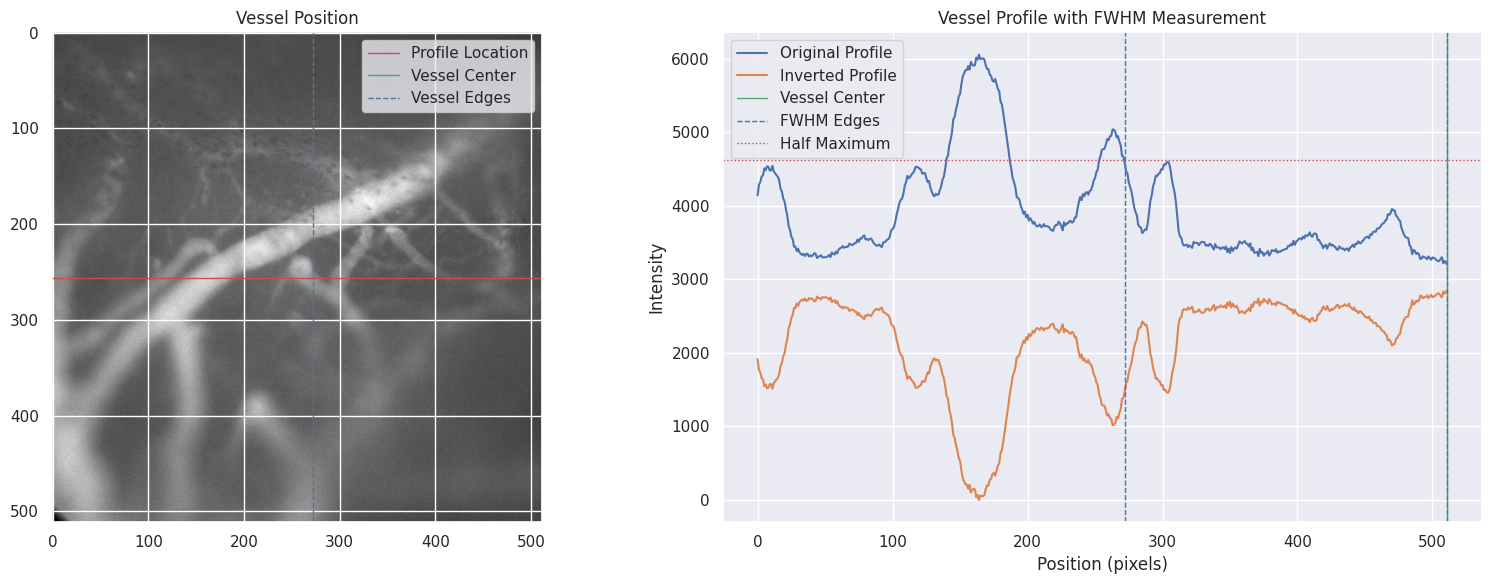

In [12]:
# Analyze a single frame
frame_idx = 1000
frame = movies.data[frame_idx, :, :]
profile = get_vessel_profile(frame, row=best_row, width=10)

# Estimate vessel diameter
diameter, vessel_pos, (left_edge, right_edge) = estimate_vessel_diameter_fwhm(profile)

print(f"Estimated vessel diameter: {diameter:.2f} pixels")
print(f"Vessel center position: {vessel_pos:.2f} pixels")
print(f"Left edge: {left_edge:.2f}, Right edge: {right_edge:.2f}")

# Create a figure to visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Show the image with vessel position
ax1.imshow(frame, cmap='gray')
ax1.axhline(y=best_row, color='r', linestyle='-', linewidth=1, label='Profile Location')
ax1.axvline(x=vessel_pos, color='g', linestyle='-', linewidth=1, label='Vessel Center')
if not np.isnan(left_edge) and not np.isnan(right_edge):
    ax1.axvline(x=left_edge, color='b', linestyle='--', linewidth=1, label='Vessel Edges')
    ax1.axvline(x=right_edge, color='b', linestyle='--', linewidth=1)
ax1.legend()
ax1.set_title('Vessel Position')

# Show the profile with FWHM
inverted_profile = np.max(profile) - profile
ax2.plot(profile, label='Original Profile')
ax2.plot(inverted_profile, label='Inverted Profile')
ax2.axvline(x=vessel_pos, color='g', linestyle='-', linewidth=1, label='Vessel Center')
if not np.isnan(left_edge) and not np.isnan(right_edge):
    ax2.axvline(x=left_edge, color='b', linestyle='--', linewidth=1, label='FWHM Edges')
    ax2.axvline(x=right_edge, color='b', linestyle='--', linewidth=1)
    ax2.axhline(y=np.max(profile) - inverted_profile[vessel_pos]/2, color='r', linestyle=':', linewidth=1, label='Half Maximum')
ax2.set_title('Vessel Profile with FWHM Measurement')
ax2.set_xlabel('Position (pixels)')
ax2.set_ylabel('Intensity')
ax2.legend()

plt.tight_layout()
plt.show()

## Analyzing Vessel Pulsatility

Now, let's track the vessel diameter over time to analyze its pulsatility. We'll analyze a segment of the recording and plot how the diameter changes.

In [13]:
# Analyze vessel pulsatility over a segment of the recording
# Let's use 10 seconds of data (or less if the recording is shorter)
segment_duration_sec = 10
frame_rate = movies.rate
num_frames = min(int(segment_duration_sec * frame_rate), movies.data.shape[0])
start_frame = 1000  # Starting from an arbitrary point in the recording

# Collect diameter measurements
diameters = []
positions = []
timestamps = []

# Process frames
for i in range(num_frames):
    frame_idx = start_frame + i
    if frame_idx >= movies.data.shape[0]:
        break
        
    # Get frame and profile
    frame = movies.data[frame_idx, :, :]
    profile = get_vessel_profile(frame, row=best_row, width=10)
    
    # Measure diameter
    diameter, pos, _ = estimate_vessel_diameter_fwhm(profile)
    
    # Store results
    diameters.append(diameter)
    positions.append(pos)
    timestamps.append(i / frame_rate)

# Convert to numpy arrays
diameters = np.array(diameters)
positions = np.array(positions)
timestamps = np.array(timestamps)

Let's visualize the vessel diameter over time:

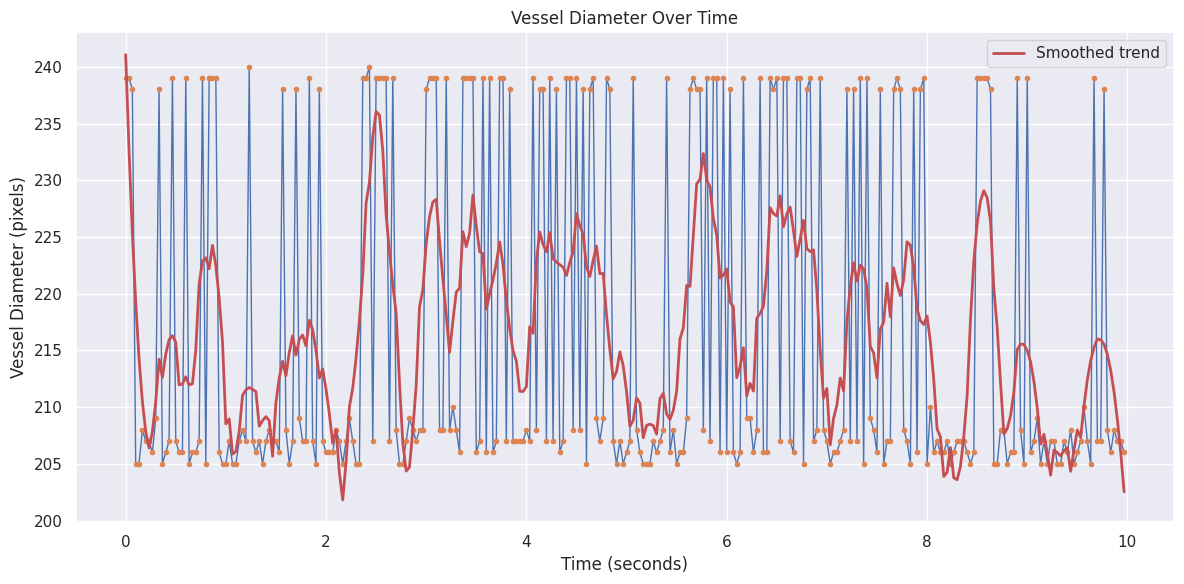

In [14]:
# Plot the vessel diameter over time
plt.figure(figsize=(12, 6))
plt.plot(timestamps, diameters, '-', linewidth=1)
plt.plot(timestamps, diameters, 'o', markersize=3)

# Add a smoothed trend line
if len(timestamps) > 5:  # Only if we have enough data points
    from scipy.signal import savgol_filter
    window_length = min(15, len(timestamps) // 2 * 2 - 1)  # Ensure it's odd and not too large
    if window_length >= 3:  # Minimum window size for Savitzky-Golay filter
        smooth_diameters = savgol_filter(diameters, window_length, 2)
        plt.plot(timestamps, smooth_diameters, 'r-', linewidth=2, label='Smoothed trend')
        plt.legend()

plt.xlabel('Time (seconds)')
plt.ylabel('Vessel Diameter (pixels)')
plt.title('Vessel Diameter Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

Let's calculate some statistics about the vessel pulsatility:

Vessel Diameter Statistics:
  Mean diameter: 216.60 pixels
  Standard deviation: 14.86 pixels
  Minimum diameter: 205.00 pixels
  Maximum diameter: 240.00 pixels
  Pulsatility index: 0.1616
  Estimated pulse rate: 7.38 Hz
  Estimated pulse rate: 442.97 beats per minute


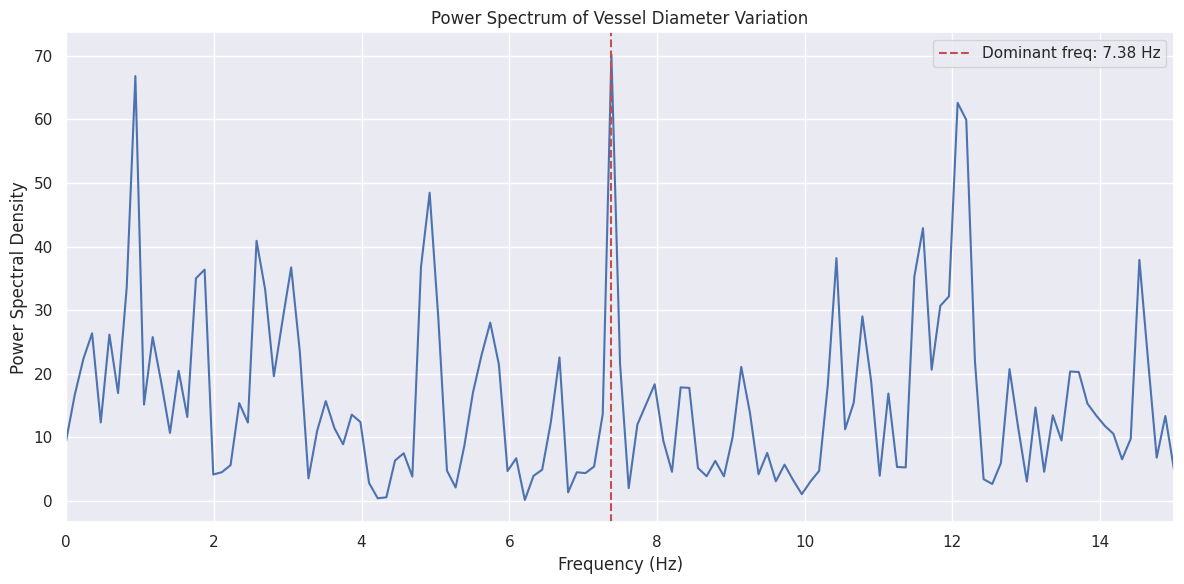

In [15]:
# Calculate pulsatility statistics
valid_diameters = diameters[~np.isnan(diameters)]  # Remove any NaN values

if len(valid_diameters) > 0:
    min_diameter = np.min(valid_diameters)
    max_diameter = np.max(valid_diameters)
    mean_diameter = np.mean(valid_diameters)
    std_diameter = np.std(valid_diameters)
    
    # Calculate pulsatility index (max-min)/mean
    pulsatility_index = (max_diameter - min_diameter) / mean_diameter if mean_diameter > 0 else np.nan
    
    print(f"Vessel Diameter Statistics:")
    print(f"  Mean diameter: {mean_diameter:.2f} pixels")
    print(f"  Standard deviation: {std_diameter:.2f} pixels")
    print(f"  Minimum diameter: {min_diameter:.2f} pixels")
    print(f"  Maximum diameter: {max_diameter:.2f} pixels")
    print(f"  Pulsatility index: {pulsatility_index:.4f}")
    
    # If we have enough data, we can try to estimate the pulse rate
    if len(timestamps) > 10:
        from scipy import signal
        
        # Remove any NaN values for FFT
        valid_indices = ~np.isnan(diameters)
        valid_diameters = diameters[valid_indices]
        valid_timestamps = timestamps[valid_indices]
        
        if len(valid_diameters) > 10:
            # Detrend the data to remove low-frequency trends
            detrended_diameters = signal.detrend(valid_diameters)
            
            # Compute the power spectrum
            freq, power = signal.welch(detrended_diameters, fs=frame_rate, nperseg=min(256, len(valid_diameters)))
            
            # Find dominant frequency (in range of physiological pulse rates, typically 1-10 Hz)
            physio_freq_mask = (freq >= 1) & (freq <= 10)
            if np.any(physio_freq_mask):
                physio_freq = freq[physio_freq_mask]
                physio_power = power[physio_freq_mask]
                if len(physio_power) > 0:
                    dominant_freq_idx = np.argmax(physio_power)
                    dominant_freq = physio_freq[dominant_freq_idx]
                    
                    print(f"  Estimated pulse rate: {dominant_freq:.2f} Hz")
                    print(f"  Estimated pulse rate: {dominant_freq * 60:.2f} beats per minute")
                    
                    # Plot the power spectrum
                    plt.figure(figsize=(12, 6))
                    plt.plot(freq, power)
                    plt.axvline(x=dominant_freq, color='r', linestyle='--', 
                                label=f'Dominant freq: {dominant_freq:.2f} Hz')
                    plt.xlabel('Frequency (Hz)')
                    plt.ylabel('Power Spectral Density')
                    plt.title('Power Spectrum of Vessel Diameter Variation')
                    plt.xlim(0, 15)  # Focus on physiologically relevant frequencies
                    plt.legend()
                    plt.grid(True)
                    plt.tight_layout()
                    plt.show()

## Exploring the Second NWB File

Let's also explore the second NWB file in the Dandiset to compare the vessel data between the two recordings.

In [16]:
# Select the second NWB file
second_asset = "sub-F15"
print(f"Selected NWB file: {asset_paths[second_asset]['path']}")
asset_url = asset_paths[second_asset]['url']
print(f"URL: {asset_url}")

# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb2 = io.read()

# Print file metadata
print("\nNWB File Metadata:")
print(f"Identifier: {nwb2.identifier}")
print(f"Session ID: {nwb2.session_id}")
print(f"Session Description: {nwb2.session_description[:100]}...")  # First 100 chars
print(f"Experiment Description: {nwb2.experiment_description}")
print(f"Institution: {nwb2.institution}")
print(f"Keywords: {nwb2.keywords[:]}")

# Print subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb2.subject.subject_id}")
print(f"Species: {nwb2.subject.species}")
print(f"Strain: {nwb2.subject.strain}")
print(f"Sex: {nwb2.subject.sex}")
print(f"Age: {nwb2.subject.age}")
print(f"Description: {nwb2.subject.description}")

# Let's examine the movies data
movies2 = nwb2.acquisition['Movies']
print(f"\nMovies Information:")
print(f"Frame rate: {movies2.rate} Hz")
print(f"Data shape: {movies2.data.shape}")
print(f"Recording duration: {movies2.data.shape[0] / movies2.rate:.2f} seconds")

Selected NWB file: sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
URL: https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/



NWB File Metadata:
Identifier: 202309_Hashmat-OCT.2023-F15BC-19102023
Session ID: F15BC-19102023
Session Description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with ...
Experiment Description: Vessel diameter and pulsatility measurement.
Institution: University of Copenhagen
Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']

Subject Information:
Subject ID: F15
Species: Mus musculus
Strain: C57BL/6J
Sex: F
Age: P9W/P16W
Description: wild-type mouse

Movies Information:
Frame rate: 54.47 Hz
Data shape: (9553, 214, 132)
Recording duration: 175.38 seconds


You can explore this second NWB file interactively on Neurosift by following this link:
[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=0.250324.1603)

Let's visualize a frame from the second NWB file to see the vessel appearance:

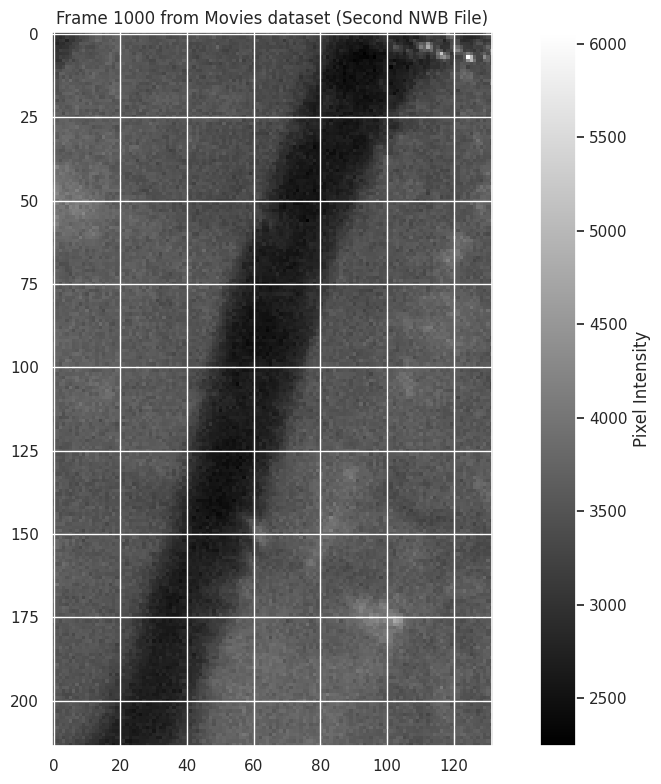

In [17]:
# Load a single frame from the second NWB file
frame_idx2 = 1000  # Choose a frame in the middle of the recording
frame2 = movies2.data[frame_idx2, :, :]

# Display the frame
plt.figure(figsize=(10, 8))
plt.imshow(frame2, cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title(f'Frame {frame_idx2} from Movies dataset (Second NWB File)')
plt.axis('on')
plt.tight_layout()
plt.show()

Let's analyze a vessel profile from this second dataset as well:

Estimated vessel diameter: 29.00 pixels
Vessel center position: 63.00 pixels


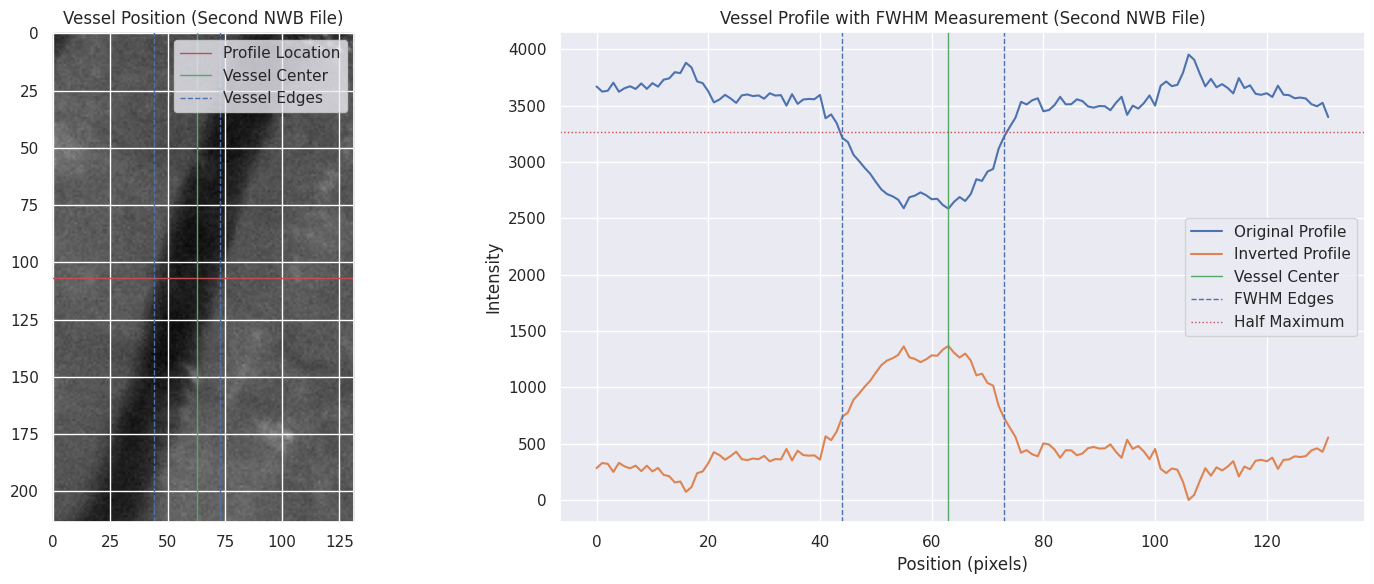

In [18]:
# For the second dataset, let's find a good row for analysis
best_row2 = frame2.shape[0] // 2  # Starting with the middle row

# Extract and visualize vessel profile
profile2 = get_vessel_profile(frame2, row=best_row2, width=5)

# Estimate vessel diameter
diameter2, vessel_pos2, (left_edge2, right_edge2) = estimate_vessel_diameter_fwhm(profile2)

print(f"Estimated vessel diameter: {diameter2:.2f} pixels")
print(f"Vessel center position: {vessel_pos2:.2f} pixels")

# Create a figure to visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Show the image with vessel position
ax1.imshow(frame2, cmap='gray')
ax1.axhline(y=best_row2, color='r', linestyle='-', linewidth=1, label='Profile Location')
ax1.axvline(x=vessel_pos2, color='g', linestyle='-', linewidth=1, label='Vessel Center')
if not np.isnan(left_edge2) and not np.isnan(right_edge2):
    ax1.axvline(x=left_edge2, color='b', linestyle='--', linewidth=1, label='Vessel Edges')
    ax1.axvline(x=right_edge2, color='b', linestyle='--', linewidth=1)
ax1.legend()
ax1.set_title('Vessel Position (Second NWB File)')

# Show the profile with FWHM
inverted_profile2 = np.max(profile2) - profile2
ax2.plot(profile2, label='Original Profile')
ax2.plot(inverted_profile2, label='Inverted Profile')
ax2.axvline(x=vessel_pos2, color='g', linestyle='-', linewidth=1, label='Vessel Center')
if not np.isnan(left_edge2) and not np.isnan(right_edge2):
    ax2.axvline(x=left_edge2, color='b', linestyle='--', linewidth=1, label='FWHM Edges')
    ax2.axvline(x=right_edge2, color='b', linestyle='--', linewidth=1)
    ax2.axhline(y=np.max(profile2) - inverted_profile2[vessel_pos2]/2, color='r', linestyle=':', linewidth=1, label='Half Maximum')
ax2.set_title('Vessel Profile with FWHM Measurement (Second NWB File)')
ax2.set_xlabel('Position (pixels)')
ax2.set_ylabel('Intensity')
ax2.legend()

plt.tight_layout()
plt.show()

Let's analyze pulsatility in the second dataset as well:

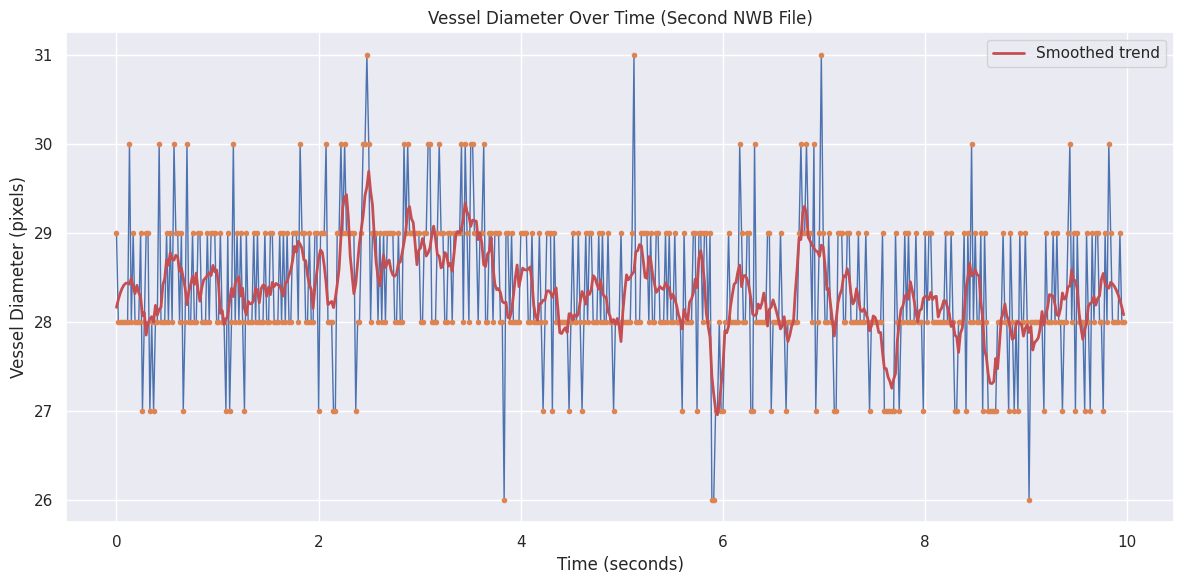

Vessel Diameter Statistics (Second NWB File):
  Mean diameter: 28.35 pixels
  Standard deviation: 0.79 pixels
  Minimum diameter: 26.00 pixels
  Maximum diameter: 31.00 pixels
  Pulsatility index: 0.1764


In [19]:
# Analyze vessel pulsatility for the second dataset
segment_duration_sec = 10
frame_rate2 = movies2.rate
num_frames2 = min(int(segment_duration_sec * frame_rate2), movies2.data.shape[0])
start_frame2 = 1000

# Collect diameter measurements
diameters2 = []
positions2 = []
timestamps2 = []

# Process frames
for i in range(num_frames2):
    frame_idx = start_frame2 + i
    if frame_idx >= movies2.data.shape[0]:
        break
        
    # Get frame and profile
    frame = movies2.data[frame_idx, :, :]
    profile = get_vessel_profile(frame, row=best_row2, width=5)
    
    # Measure diameter
    diameter, pos, _ = estimate_vessel_diameter_fwhm(profile)
    
    # Store results
    diameters2.append(diameter)
    positions2.append(pos)
    timestamps2.append(i / frame_rate2)

# Convert to numpy arrays
diameters2 = np.array(diameters2)
positions2 = np.array(positions2)
timestamps2 = np.array(timestamps2)

# Plot the vessel diameter over time
plt.figure(figsize=(12, 6))
plt.plot(timestamps2, diameters2, '-', linewidth=1)
plt.plot(timestamps2, diameters2, 'o', markersize=3)

# Add a smoothed trend line
if len(timestamps2) > 5:
    from scipy.signal import savgol_filter
    window_length = min(15, len(timestamps2) // 2 * 2 - 1)
    if window_length >= 3:
        smooth_diameters2 = savgol_filter(diameters2, window_length, 2)
        plt.plot(timestamps2, smooth_diameters2, 'r-', linewidth=2, label='Smoothed trend')
        plt.legend()

plt.xlabel('Time (seconds)')
plt.ylabel('Vessel Diameter (pixels)')
plt.title('Vessel Diameter Over Time (Second NWB File)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate pulsatility statistics for the second dataset
valid_diameters2 = diameters2[~np.isnan(diameters2)]

if len(valid_diameters2) > 0:
    min_diameter2 = np.min(valid_diameters2)
    max_diameter2 = np.max(valid_diameters2)
    mean_diameter2 = np.mean(valid_diameters2)
    std_diameter2 = np.std(valid_diameters2)
    
    # Calculate pulsatility index
    pulsatility_index2 = (max_diameter2 - min_diameter2) / mean_diameter2 if mean_diameter2 > 0 else np.nan
    
    print(f"Vessel Diameter Statistics (Second NWB File):")
    print(f"  Mean diameter: {mean_diameter2:.2f} pixels")
    print(f"  Standard deviation: {std_diameter2:.2f} pixels")
    print(f"  Minimum diameter: {min_diameter2:.2f} pixels")
    print(f"  Maximum diameter: {max_diameter2:.2f} pixels")
    print(f"  Pulsatility index: {pulsatility_index2:.4f}")

## Comparing Results Between Files

Let's compare the vessel characteristics across the two different recordings:

In [20]:
# Create a comparison table
comparison_data = {
    'File': ['First NWB (sub-031224-M4)', 'Second NWB (sub-F15)'],
    'Subject': [f"{nwb.subject.strain} ({nwb.subject.sex})", 
                f"{nwb2.subject.strain} ({nwb2.subject.sex})"],
    'Frame Rate (Hz)': [movies.rate, movies2.rate],
    'Frame Dimensions': [f"{movies.data.shape[1]}x{movies.data.shape[2]}", 
                        f"{movies2.data.shape[1]}x{movies2.data.shape[2]}"],
    'Recording Duration (s)': [movies.data.shape[0] / movies.rate, 
                              movies2.data.shape[0] / movies2.rate]
}

# Add diameter statistics if available
if 'mean_diameter' in locals() and 'mean_diameter2' in locals():
    comparison_data['Mean Vessel Diameter (px)'] = [mean_diameter, mean_diameter2]
    comparison_data['Vessel Diameter StdDev (px)'] = [std_diameter, std_diameter2]
    comparison_data['Pulsatility Index'] = [pulsatility_index, pulsatility_index2]

# Create a DataFrame for better display
comparison_df = pd.DataFrame(comparison_data)
comparison_df

File       Subject  Frame Rate (Hz) Frame Dimensions  \
0  First NWB (sub-031224-M4)   C57BL/6 (M)            30.00          512x512   
1       Second NWB (sub-F15)  C57BL/6J (F)            54.47          214x132   

   Recording Duration (s)  Mean Vessel Diameter (px)  \
0              200.000000                 216.600000   
1              175.380944                  28.345588   

   Vessel Diameter StdDev (px)  Pulsatility Index  
0                    14.863154           0.161588  
1                     0.787108           0.176394

## Advanced Visualization: Vessel Kymograph

A kymograph is a 2D representation of spatial information over time, which can be useful for visualizing vessel dynamics. Let's create a kymograph for the vessel in each recording:

In [21]:
def create_kymograph(movie_data, row, width, num_frames=300, start_frame=0):
    """
    Creates a kymograph from movie data by extracting intensity profiles over time.
    
    Parameters:
    -----------
    movie_data : h5py.Dataset
        The movie data (time, height, width)
    row : int
        Row index to extract profiles from
    width : int
        Width of the region to average for each profile
    num_frames : int
        Number of frames to include in the kymograph
    start_frame : int
        First frame to include
    
    Returns:
    --------
    kymograph : numpy.ndarray
        2D array with time on the y-axis and spatial position on the x-axis
    """
    # Limit frames to what's available
    end_frame = min(start_frame + num_frames, movie_data.shape[0])
    actual_frames = end_frame - start_frame
    
    # Initialize kymograph array
    kymograph = np.zeros((actual_frames, movie_data.shape[2]))
    
    # Fill the kymograph with profiles
    for i in range(actual_frames):
        frame_idx = start_frame + i
        frame = movie_data[frame_idx, :, :]
        profile = get_vessel_profile(frame, row=row, width=width)
        kymograph[i, :] = profile
        
    return kymograph

Let's create and visualize kymographs from both recordings:

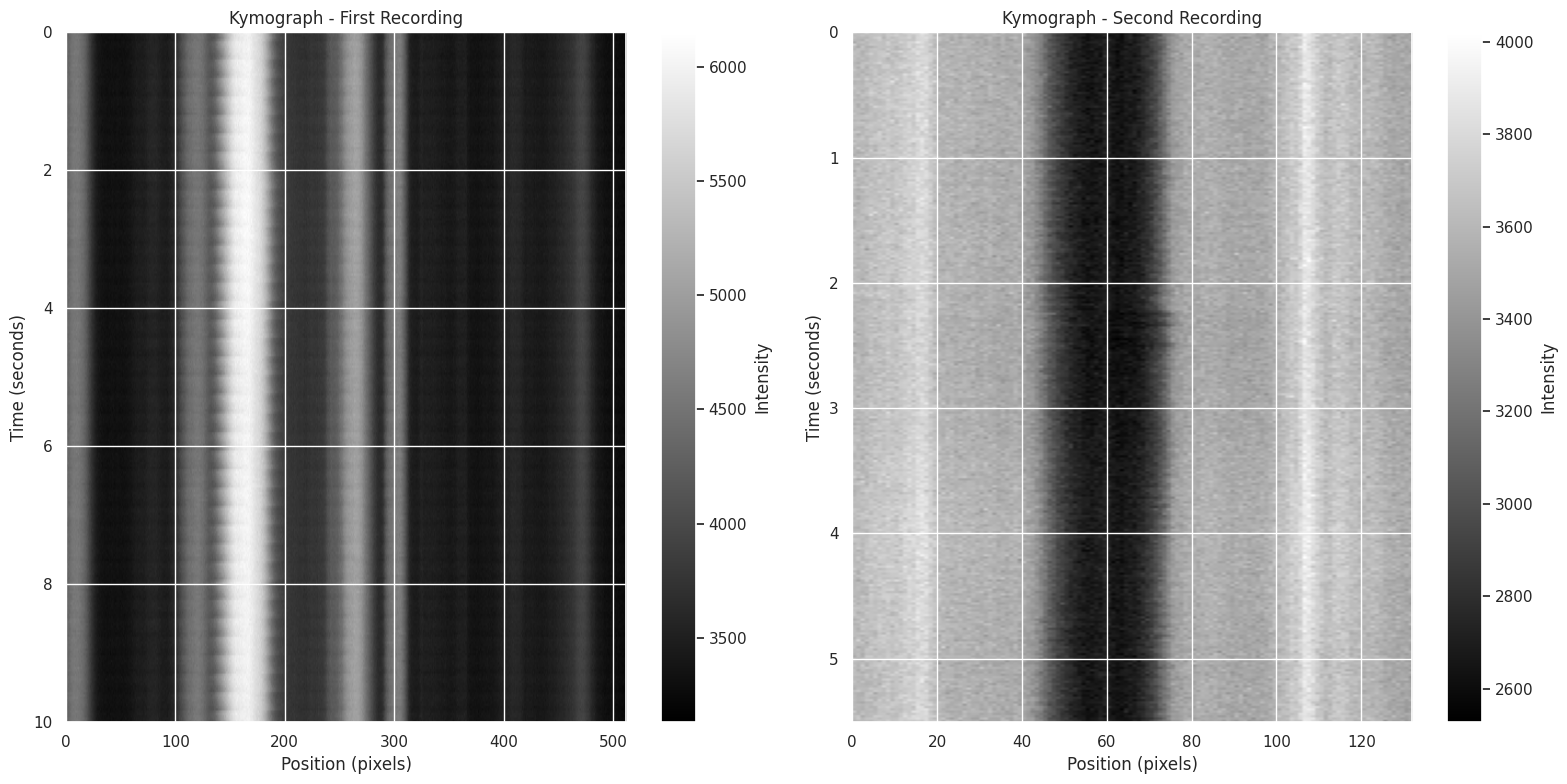

In [22]:
# Create kymographs
num_frames_kymo = 300  # Number of frames to include (10 seconds at 30 Hz)

# First dataset
kymo1 = create_kymograph(movies.data, best_row, width=10, 
                         num_frames=num_frames_kymo, start_frame=start_frame)

# Second dataset
kymo2 = create_kymograph(movies2.data, best_row2, width=5, 
                         num_frames=min(num_frames_kymo, movies2.data.shape[0]-start_frame2), 
                         start_frame=start_frame2)

# Visualize the kymographs
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# First kymograph
im1 = axes[0].imshow(kymo1, cmap='gray', aspect='auto', 
                    extent=[0, kymo1.shape[1], kymo1.shape[0]/movies.rate, 0])
axes[0].set_title('Kymograph - First Recording')
axes[0].set_xlabel('Position (pixels)')
axes[0].set_ylabel('Time (seconds)')
plt.colorbar(im1, ax=axes[0], label='Intensity')

# Second kymograph
if kymo2.size > 0:  # Check if we have data
    im2 = axes[1].imshow(kymo2, cmap='gray', aspect='auto', 
                        extent=[0, kymo2.shape[1], kymo2.shape[0]/movies2.rate, 0])
    axes[1].set_title('Kymograph - Second Recording')
    axes[1].set_xlabel('Position (pixels)')
    axes[1].set_ylabel('Time (seconds)')
    plt.colorbar(im2, ax=axes[1], label='Intensity')

plt.tight_layout()
plt.show()

## Conclusion and Future Directions

In this notebook, we've explored Dandiset 001366, which contains movies of pial vessels in mice for studying vessel diameter and pulsatility quantification. Here's a summary of what we've learned:

1. **Dataset Overview**: The Dandiset contains two NWB files with vessel imaging data from different mice (one male and one female C57BL/6 mouse), with different imaging parameters (frame rate, resolution).

2. **Vessel Diameter Analysis**: We implemented a simple method (FWHM) to measure vessel diameter from intensity profiles. This is one of several approaches mentioned in the dataset's keywords (others include Radon transform-based methods).

3. **Pulsatility Analysis**: We tracked vessel diameter over time to analyze pulsatility and calculated basic pulsatility metrics such as the pulsatility index.

4. **Advanced Visualization**: We created kymographs to visualize vessel dynamics over time, which can reveal patterns of vessel contraction and dilation.

**Future Directions**:

1. **Compare Different Measurement Methods**: Implement and compare other vessel diameter quantification methods mentioned in the dataset keywords, such as Radon transform-based approaches.

2. **Automate Vessel Detection**: Develop more robust methods to automatically locate vessels in the images and identify optimal locations for diameter measurements.

3. **Correlation with Physiological Parameters**: If available, correlate vessel pulsatility with physiological parameters such as heart rate, blood pressure, or breathing.

4. **Frequency Analysis**: Perform more detailed frequency analysis of vessel pulsations to identify characteristic frequencies that may correspond to cardiac or respiratory cycles.

5. **Spatial Analysis**: Extend the analysis to track vessel diameters at multiple locations along the vessel to study propagation of pulsations.

This notebook provides a starting point for researchers interested in quantifying vessel diameter and pulsatility from imaging data. The methods demonstrated here can be adapted and extended for more sophisticated analyses.

## Acknowledgements

This notebook was created to help researchers explore and analyze data from Dandiset 001366. The dataset was contributed by Aditya Ranjan, Devin T. Wong, Qinwen Huang, Hashmat Ghanizada, Maiken Nedergaard, Douglas H. Kelley, and Kimberly A. S. Boster.

Citation:
Ranjan, Aditya; Wong, Devin T.; Huang, Qinwen; Ghanizada, Hashmat; Nedergaard, Maiken; Kelley, Douglas H.; Boster, Kimberly A. S. (2025) Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification (Version 0.250324.1603) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001366/0.250324.1603